In [2]:
import pandas as pd

file = 'exp2_dataset.xlsx'
df_Q1 = pd.read_excel(file, sheet_name = 'all_Q1')
df_Q2 = pd.read_excel(file, sheet_name = 'all_Q2')

## 1 лист

In [3]:
df_Q1_long = df_Q1.melt(
    id_vars=['Item', 'Condition', 'Type', 'NPI'],
    value_vars=['gemini', 'qwen', 'llama', 'mistral', 'moonlight',
                'gemma', 'deephermes', 'ds_distill_llama'],
    var_name='Model',
    value_name='Rating'
)

In [ ]:
df_Q1_long.head()

,Item,Condition,Type,NPI,Model,Rating
0,1,1,premise conditional,none,gemini,5
1,1,2,premise conditional,all that,gemini,5
2,1,3,bare conditional,none,gemini,7
3,1,4,bare conditional,all that,gemini,7
4,2,1,premise conditional,none,gemini,5


In [ ]:
df_Q1_long.groupby(['Condition'])['Rating'].mean()

,Rating
Condition,
1,5.994792
2,5.833333
3,5.828125
4,5.593750


In [ ]:
df_Q1_long.groupby(['Condition'])['Rating'].std()

,Rating
Condition,
1,0.946182
2,0.917162
3,0.860196
4,0.955317


In [ ]:
df_Q1_long.groupby(['Model'])['Rating'].std().mean()

np.float64(0.7976311480604428)

In [ ]:
df_Q1_long.groupby(['Item'])['Rating'].std().mean()

np.float64(0.8379294834196096)

<ipython-input-12-61cbd58f76d2>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-12-61cbd58f76d2>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


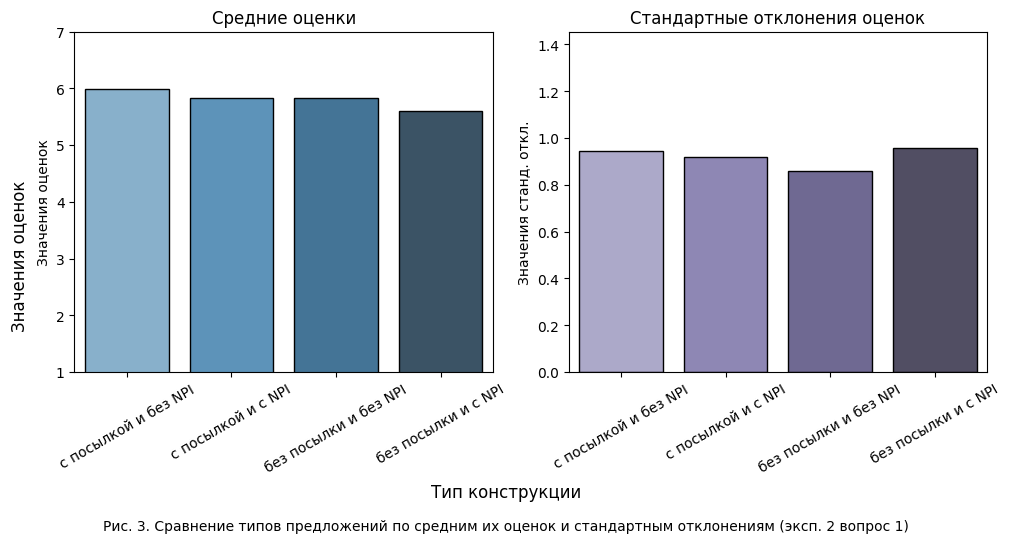

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

summary = df_Q1_long.groupby('Condition')['Rating'].agg(['mean', 'std']).reset_index()

condition_labels = {
    1: 'с посылкой и без NPI',
    2: 'с посылкой и с NPI',
    3: 'без посылки и без NPI',
    4: 'без посылки и с NPI',
}

summary['Condition_label'] = summary['Condition'].map(condition_labels)

fig, axs = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

sns.barplot(
    data=summary,
    x='Condition_label',
    y='mean',
    palette='Blues_d',
    edgecolor='black',
    ax=axs[0]
)
axs[0].set_title('Средние оценки')
axs[0].tick_params(axis='x', rotation=30)
axs[0].set_ylim(1, 7)

sns.barplot(
    data=summary,
    x='Condition_label',
    y='std',
    palette='Purples_d',
    edgecolor='black',
    ax=axs[1]
)
axs[1].set_title('Стандартные отклонения оценок')
axs[1].tick_params(axis='x', rotation=30)
axs[1].set_ylim(0, summary['std'].max() + 0.5)
fig.supxlabel('Тип конструкции', fontsize=12)
fig.supylabel('Значения оценок', fontsize=12)

axs[0].set_xlabel('')
axs[0].set_ylabel('Значения оценок')
axs[1].set_xlabel('')
axs[1].set_ylabel('Значения станд. откл.')

fig.text(0.5, -0.05, 'Рис. 3. Сравнение типов предложений по средним их оценок и стандартным отклонениям (эксп. 2 вопрос 1)',
         ha='center', fontsize=10)

plt.show()

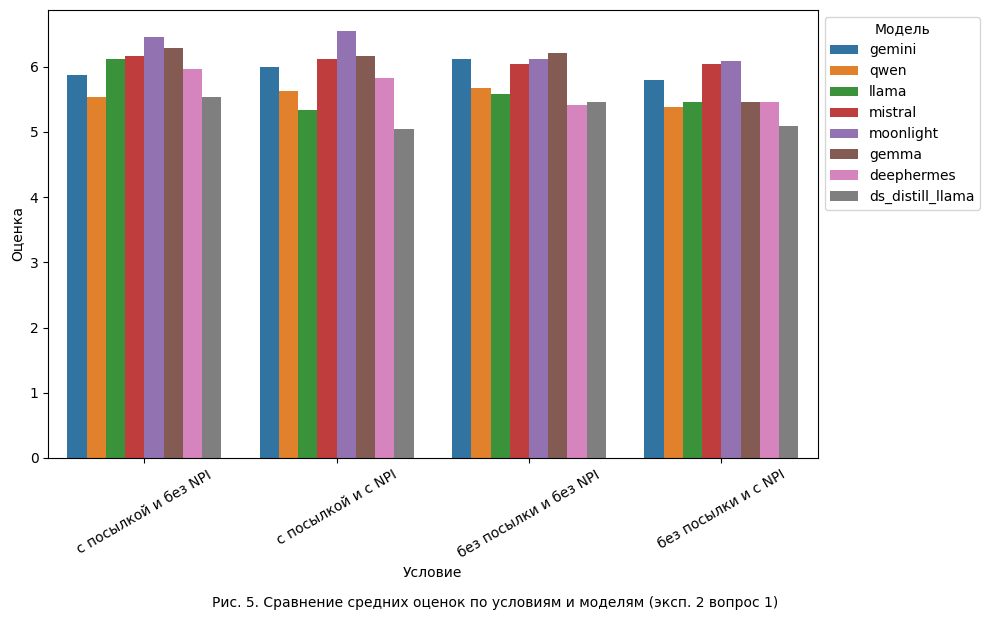

In [6]:
df_copy1 = df_Q1_long.copy()
df_copy1['Condition_label'] = df_copy1['Condition'].map(condition_labels)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_copy1,
    x='Condition_label',
    y='Rating',
    hue='Model',
    errorbar=None
)

plt.xlabel('Условие')
plt.ylabel('Оценка')
plt.xticks(rotation=30)
plt.legend(title='Модель', bbox_to_anchor=(1, 1), loc='upper left')
plt.gcf().text(0.5, -0.02, 'Рис. 5. Сравнение средних оценок по условиям и моделям (эксп. 2 вопрос 1)',
         ha='center', fontsize=10)
plt.tight_layout()
plt.show()

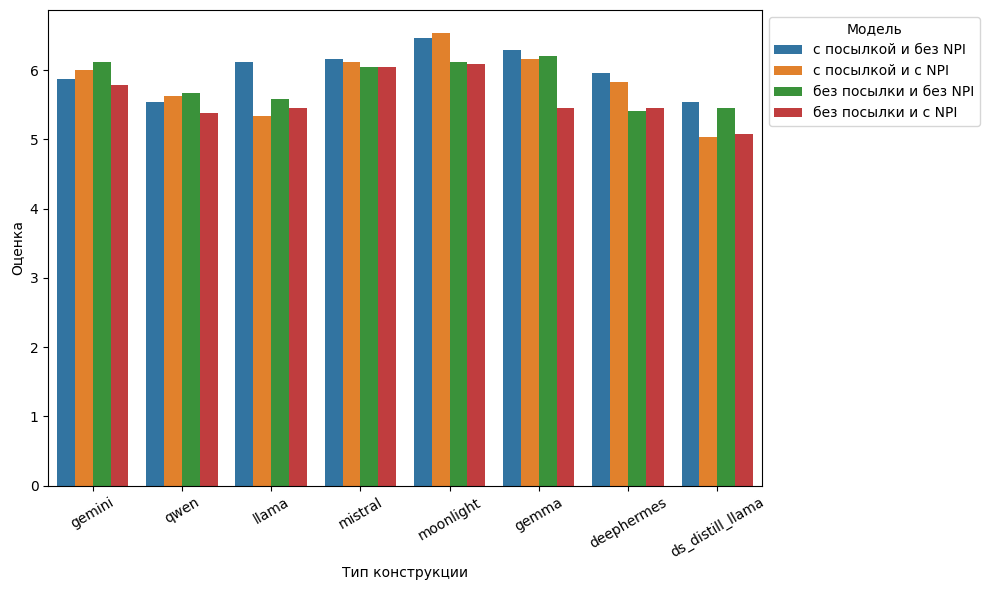

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_copy1,
    x='Model',
    y='Rating',
    hue='Condition_label',
    errorbar=None
)

plt.xlabel('Тип конструкции')
plt.ylabel('Оценка')
plt.xticks(rotation=30)
plt.legend(title='Модель', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
df_Q1_long.to_excel('exp2_Q1.xlsx', index=False)

## Лист 2

In [8]:
df_Q2_long = df_Q2.melt(
    id_vars=['Item', 'Condition', 'Type', 'NPI'],
    value_vars=['gemini', 'qwen', 'llama', 'mistral', 'moonlight',
                'gemma', 'deephermes', 'ds_distill_llama'],
    var_name='Model',
    value_name='Rating'
)

In [ ]:
df_Q2_long.head()

,Item,Condition,Type,NPI,Model,Rating
0,1,1,premise conditional,none,gemini,4
1,1,2,premise conditional,all that,gemini,3
2,1,3,bare conditional,none,gemini,1
3,1,4,bare conditional,all that,gemini,2
4,2,1,premise conditional,none,gemini,2


In [ ]:
df_Q2_long.groupby(['Condition'])['Rating'].mean()

,Rating
Condition,
1,5.734375
2,5.307292
3,4.677083
4,4.661458


In [ ]:
df_Q2_long.groupby(['Condition'])['Rating'].std()

,Rating
Condition,
1,1.620311
2,1.761826
3,1.709198
4,1.750086


In [ ]:
df_Q2_long.groupby(['Model'])['Rating'].std().mean()

np.float64(1.5093259225251003)

In [ ]:
df_Q2_long.groupby(['Item'])['Rating'].std().mean()

np.float64(1.5252705345591089)

<ipython-input-15-52ff40961cab>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-15-52ff40961cab>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


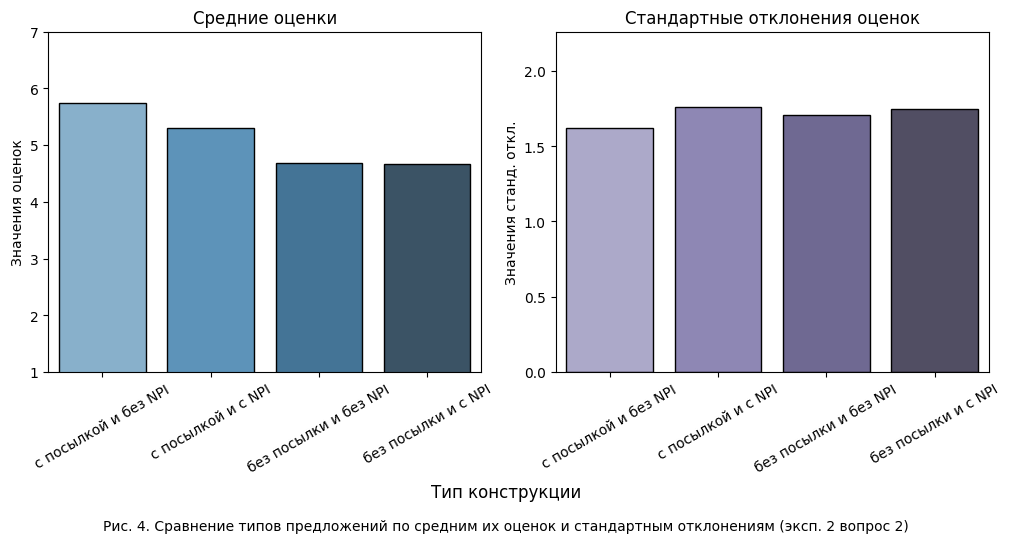

In [ ]:
sns.barplot(
    data=summary2,
    x='Condition_label',
    y='mean',
    palette='Blues_d',
    edgecolor='black',
    ax=axs[0]
)
axs[0].set_title('Средние оценки')
axs[0].tick_params(axis='x', rotation=30)
axs[0].set_ylim(1, 7)

sns.barplot(
    data=summary2,
    x='Condition_label',
    y='std',
    palette='Purples_d',
    edgecolor='black',
    ax=axs[1]
)
axs[1].set_title('Стандартные отклонения оценок')
axs[1].tick_params(axis='x', rotation=30)
axs[1].set_ylim(0, summary2['std'].max() + 0.5)
fig.supxlabel('Тип конструкции', fontsize=12)

axs[0].set_xlabel('')
axs[0].set_ylabel('Значения оценок')
axs[1].set_xlabel('')
axs[1].set_ylabel('Значения станд. откл.')

fig.text(0.5, -0.05, 'Рис. 4. Сравнение типов предложений по средним их оценок и стандартным отклонениям (эксп. 2 вопрос 2)',
         ha='center', fontsize=10)

plt.show()

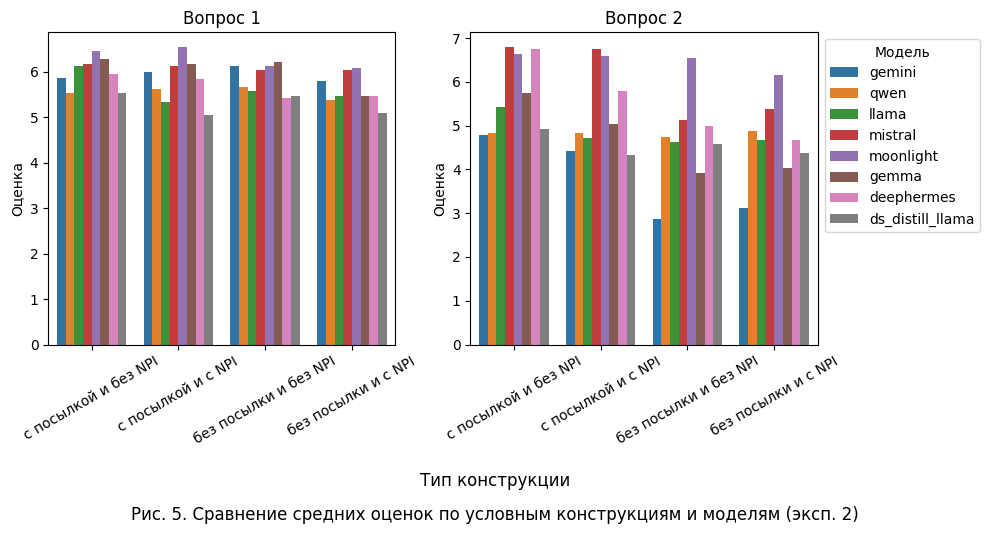

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

condition_labels = {
    1: 'с посылкой и без NPI',
    2: 'с посылкой и с NPI',
    3: 'без посылки и без NPI',
    4: 'без посылки и с NPI',
}

df_copy1 = df_Q1_long.copy()
df_copy1['Condition_label'] = df_copy1['Condition'].map(condition_labels)

df_copy2 = df_Q2_long.copy()
df_copy2['Condition_label'] = df_copy2['Condition'].map(condition_labels)

fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True)

sns.barplot(
    data=df_copy1,
    x='Condition_label',
    y='Rating',
    hue='Model',
    errorbar=None,
    legend=False,
    ax=axs[0]
)
axs[0].set_title('Вопрос 1')
axs[0].set_xlabel('')
axs[0].set_ylabel('Оценка')
axs[0].tick_params(axis='x', rotation=30)

sns.barplot(
    data=df_copy2,
    x='Condition_label',
    y='Rating',
    hue='Model',
    errorbar=None,
    ax=axs[1]
)
axs[1].set_title('Вопрос 2')
axs[1].set_xlabel('')
axs[1].set_ylabel('Оценка')
axs[1].legend(title='Модель', bbox_to_anchor=(1, 1), loc='upper left')
axs[1].tick_params(axis='x', rotation=30)

fig.supxlabel('Тип конструкции', fontsize=12)
fig.text(0.5, -0.05, 'Рис. 5. Сравнение средних оценок по условным конструкциям и моделям (эксп. 2)', ha='center', fontsize=12)
plt.tight_layout()
plt.show()

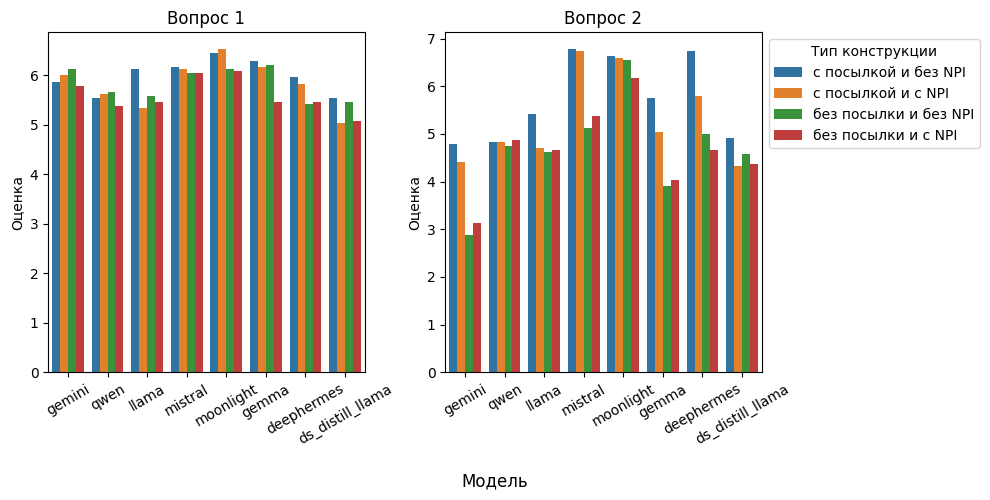

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True)

sns.barplot(
    data=df_copy1,
    x='Model',
    y='Rating',
    hue='Condition_label',
    errorbar=None,
    legend=False,
    ax=axs[0]
)
axs[0].set_title('Вопрос 1')
axs[0].set_xlabel('')
axs[0].set_ylabel('Оценка')
axs[0].tick_params(axis='x', rotation=30)

sns.barplot(
    data=df_copy2,
    x='Model',
    y='Rating',
    hue='Condition_label',
    errorbar=None,
    ax=axs[1]
)
axs[1].set_title('Вопрос 2')
axs[1].set_xlabel('')
axs[1].set_ylabel('Оценка')
axs[1].legend(title='Тип конструкции', bbox_to_anchor=(1, 1), loc='upper left')
axs[1].tick_params(axis='x', rotation=30)

fig.supxlabel('Модель', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
df_Q2_long.to_excel('exp2_Q2.xlsx', index=False)